<a href="https://colab.research.google.com/github/blueberrylazjy/Note_of_PINNs/blob/main/3D_Neutron_Diffusion_Equation(Reactor_Core_only).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/blueberrylazjy/Note_of_PINNs-by-keras/blob/main/3D_Neutron_Diffusion_Equation(Reactor_Core_only).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4>Neutron diffusion equation of a reactor core without reflector</h4>
<h4 >1. Equation : </h4>

<h4>$ -D\triangle\phi(x,y,z) + \Sigma_a\phi(x,y,z) = \frac{1}{k}\nu\Sigma_f\phi(x,y,z) $　</h4>

$ D :$拡散係数\
$\phi(x,y,z) :$中性子束\
$\Sigma_a :$中性子吸収断面積\
$k :$実効増倍率\
$\Sigma_f :$核分裂断面積\
$\nu :$中性子増倍率
<h4 >2. Analytical solution : </h4>

<h4>1)first, transform the equation to:</h4>
<h4> $\Delta\phi(x,y,z) + B^2\phi(x,y,z) = 0\hspace{2mm}, \hspace{12mm} B^2 = \frac{\frac{\nu\Sigma_f}{k}-\Sigma_a}{D}$</h4>
<h4>2)Secondly, using variable separation to break the equation down to three seperated equations corresponding to x, y and z axis</h4>
<h4>$ \phi_x = \phi_1 \mathrm{cos}(B_1x)\hspace{2mm}, $</h4>
<h4>$ \phi_y = \phi_2 \mathrm{cos}(B_2y)\hspace{2mm}, $</h4>
<h4>$ \phi_z = \phi_3 \mathrm{cos}(B_3z)\hspace{2mm}, $</h4>
<h4>$\phi_1\phi_2\phi_3 = \phi_0\hspace{2mm}, B_1^2+B_2^2+B_3^2 = B^ 2$</h4>

<h4>3)Finally, multiplying the equations for the three directions to obtain the final solution </h4>
<h4>$ \phi(x,y,z) = \phi_0 \mathrm{cos}(B_1x)\mathrm{cos}(B_2x)\mathrm{cos}(B_3x) $</h4>
<h4> Applying the boundary condition leads to:</h4>
<h4>$ B_1 = \frac{\pi}{a}, B_2 = \frac{\pi}{b}, B_3 = \frac{\pi}{c}   $</h4>

In [1]:
import tensorflow as tf
from tensorflow import keras
from time import time

In [2]:
def allocate_gpu_memory(gpu_number=0):
    physical_devices = tf.config.experimental.list_physical_devices('GPU')

    if physical_devices:
        try:
            print("Found {} GPU(s)".format(len(physical_devices)))
            tf.config.set_visible_devices(physical_devices[gpu_number], 'GPU')
            tf.config.experimental.set_memory_growth(physical_devices[gpu_number], True)
            print("#{} GPU memory is allocated".format(gpu_number))
        except RuntimeError as e:
            print(e)
    else:
        print("Not enough GPU hardware devices available")

allocate_gpu_memory(0)

Found 1 GPU(s)
#0 GPU memory is allocated


In [3]:
# D = 0.05
#s igma_a = 1.0e-25
# sigma_f = 1.0e-26
# k=1
v=2.5
phi_0 = 10
a = 5
b = 5
c= 5

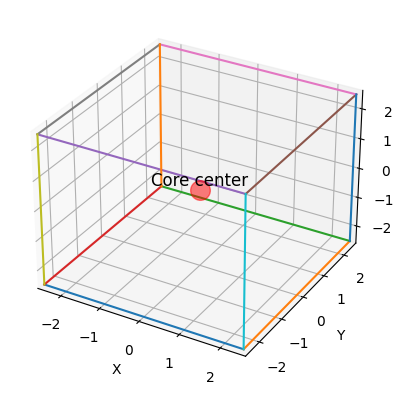

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


vertices = [
    (-a/2, -b/2, -c/2), (a/2, -b/2, -c/2), (a/2, b/2, -c/2), (-a/2, b/2, -c/2),  # Bottom face
    (-a/2, -b/2, c/2), (a/2, -b/2, c/2), (a/2, b/2, c/2), (-a/2, b/2, c/2)   # Top face
]

edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    x = [vertices[edge[0]][0], vertices[edge[1]][0]]
    y = [vertices[edge[0]][1], vertices[edge[1]][1]]
    z = [vertices[edge[0]][2], vertices[edge[1]][2]]
    ax.plot(x, y, z)

# 中軸のプロット
ax.scatter([0],[0],[0], s=200, c="r", alpha=0.5)
ax.text(0,0,0,"Core center", fontsize=12, ha='center', va='bottom')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-a/2, a/2)
ax.set_ylim(-b/2, b/2)
ax.set_zlim(-c/2, c/2)

plt.show()



<h4>$ \phi_0 = 1\hspace{2mm}, a =5, b =5, c=5,  $</h4>
<h4>$ k = 1 $(臨界)</h4>
<h4>$ \nu = 2.5 $</h4>

<h4 >2. Analytical solution : </h4>

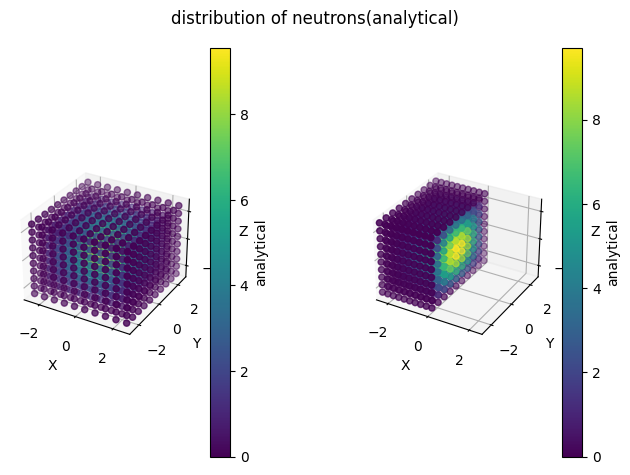

In [5]:
# analytical solution
# define function phi
B1 = 3.1415926 / a
B2 = 3.1415926 / b
B3 = 3.1415926 / c
def phi(x, y, z, a, b, c, phi_0):
    B1 = 3.1415926 / a
    B2 = 3.1415926 / b
    B3 = 3.1415926 / c
    return phi_0 * np.cos(B1 * x) * np.cos(B2 * y) * np.cos(B3 * z)

x = np.linspace(-a / 2, a / 2, 10)
y = np.linspace(-b / 2, b / 2, 10)
z = np.linspace(-c / 2, c / 2, 10)
x, y, z = np.meshgrid(x, y, z)

Phi = phi(x, y, z, a, b, c, phi_0)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(x, y, z, c=Phi, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.suptitle('distribution of neutrons(analytical)')
cbar1 = fig.colorbar(scatter1, ax=ax1)
cbar1.set_label('analytical')

x = np.linspace(-a / 2, 0, 10)
y = np.linspace(-b / 2, b / 2, 10)
z = np.linspace(-c / 2, c / 2, 10)
x, y, z = np.meshgrid(x, y, z)
Phi = phi(x, y, z, a, b, c, phi_0)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(x, y, z, c=Phi, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2.5, 2.5])
cbar2 = fig.colorbar(scatter2, ax=ax2)
cbar2.set_label('analytical')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()


<h4> Compose simulation methods</h4>
<h3> $\frac{\mathrm{d}^2\phi_x}{\mathrm{d}x^2} + B_1^2\phi_x = 0\hspace{2mm}, B_1 = \frac{\pi}{a}$</h3>
<h4>Euler's method:</h4>

<h3>$\frac{\phi_{n+1}-\phi_n}{\Delta x} = \theta_n, \hspace{6mm} \frac{\theta_{n+1}-\theta_n}{\Delta x} = -B^2\phi_n,  $</h3>
<h3>$\theta_{n+1} = \theta_n - \Delta xB^2\phi_n$</h3>
<h3>$\theta_n \Delta x +\phi_n = \phi_{n+1} $ </h3>
<h4>Boundary conditions:</h4>
Due to the symmetry, neutrons diffuse equally in both left and right directions. As a result, the neutron flux at the origin is zero, which leads to the boundary condition above.
<h3>$ J(a/2) = \frac{\mathrm{d}\phi}{\mathrm{d}x}|_{x = a/2} = 0$ </h3>

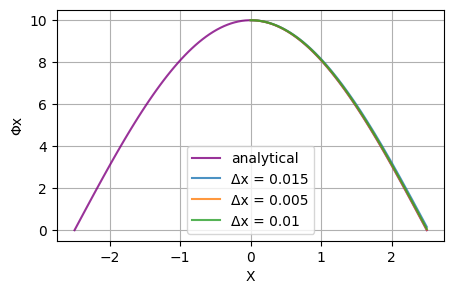

In [6]:
B1 = 3.1415926 / a
# simulation
deltax = 0.015
lenth = int((a/2)/deltax)
x1 = np.linspace(0, a / 2, lenth)
phi_1 = [phi_0]
theta_1 = [0]

for i in range(lenth):
    theta_1.append(theta_1[i]-deltax*(B1)**2*phi_1[i])
    phi_1.append(theta_1[i]*deltax+phi_1[i])


# simulation
deltax = 0.005
lenth = int((a/2)/deltax)
x2 = np.linspace(0, a / 2, lenth)
phi_2 = [phi_0]
theta_2 = [0]

for i in range(lenth):
    theta_2.append(theta_2[i]-deltax*(B1)**2*phi_2[i])
    phi_2.append(theta_2[i]*deltax+phi_2[i])

deltax = 0.01
lenth = int((a/2)/deltax)
x3 = np.linspace(0, a / 2, lenth)
phi_3 = [phi_0]
theta_3 = [0]

for i in range(lenth):
    theta_3.append(theta_3[i]-deltax*phi_3[i]*(B1)**2)
    phi_3.append(theta_3[i]*deltax+phi_3[i])


# analytical solution corresponding to x axis
x =np.linspace(-a/2, a / 2, 100)
phi_x_analytical = phi_0 * np.cos(B1*x)
plt.figure(figsize=(5,3))
plt.plot(x, phi_x_analytical, c ="purple", alpha=0.8, label="analytical")
plt.plot(x1, phi_1[:166],  alpha=0.8, label="Δx = 0.015")
plt.plot(x2, phi_2[:500],  alpha=0.8, label="Δx = 0.005")
plt.plot(x3, phi_3[:250],  alpha=0.8, label="Δx = 0.01")
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φx")
plt.legend()
plt.show()

First, we try the model plotted above, assuming all axis to have the same length.

non-cube conditions discussed later because different model compositions and input data preprocess may be considered useful.

In [7]:

def MLP(n_input,  n_output, n_neuron, n_layer, act_fn):
    tf.random.set_seed(1234)
    input1 = keras.layers.Input(shape=(n_input,))
    input2 = keras.layers.Input(shape=(n_input,))
    input3 = keras.layers.Input(shape=(n_input,))


    merged = keras.layers.concatenate([input1, input2, input3])
    hidden_layers=[]

    for _ in range(n_layer):
        hidden = keras.layers.Dense(
            units=n_neuron,
            activation=act_fn,
            kernel_initializer=tf.keras.initializers.GlorotNormal())
        hidden_layers.append(hidden)

    for hidden in hidden_layers:
            merged = hidden(merged)


    output = keras.layers.Dense(
            units=n_output,
            #activation=act_fn,
            #kernel_initializer=tf.keras.initializers.GlorotNormal()
            )(merged)

    model = tf.keras.models.Model(inputs=[input1, input2, input3], outputs=output)

    return model


In [8]:
class EarlyStopping:

    def __init__(self, patience, verbose=0):
        self.stopped = 0
        self.epoch = 0
        self.pre_loss = float('inf')
        self.patience = patience
        self.verbose = verbose # 早期終了メッセージの出力フラグをパラメーターで初期化

    def __call__(self, current_loss):

        if self.pre_loss <= current_loss:
            self.epoch += 1

            if self.epoch > self.patience:
                self.epoch = 0
                self.pre_loss = current_loss
                return True

        else:
            self.epoch = 0
            self.pre_loss = current_loss

        return False

In [9]:
class PhysicsInformedNNs():

    def __init__(self, n_input, n_output, n_neuron, n_layer, epochs, loss_weights, act_fn='tanh'):
        self.n_input = n_input
        self.n_output = n_output
        self.n_neuron = n_neuron
        self.n_layer = n_layer
        self.epochs = epochs
        self.act_fn = act_fn
        self.loss_weights = loss_weights
        self.min_learning_rate = 5.0e-7

    def build(self, optimizer, loss_fn, early_stopping, factor):
        self._model = MLP(self.n_input, self.n_output, self.n_neuron, self.n_layer, self.act_fn)
        self._optimizer = optimizer
        self._loss_fn = loss_fn
        self._early_stopping = early_stopping
        self._model_weights_save = [0, 0, self._model.get_weights()]
        self._loss_min = float('inf')
        self.factor = factor
        return self

    def train_step(self, x_boundary_data,
                   x_boundary_data_y, x_boundary_data_z,
                   y_boundary_data, y_boundary_data_x,
                   y_boundary_data_z,z_boundary_data,
                   z_boundary_data_x, z_boundary_data_y,
                   p_data, x_pinn,y_pinn,z_pinn, KB, loop):


        with tf.GradientTape() as tape_total:
            tape_total.watch(self._model.trainable_variables)

            # boundaries
            p_pred = self._model([x_boundary_data,x_boundary_data_y, x_boundary_data_z])
            loss11 = self._loss_fn(p_pred, p_data)
            p_pred = self._model([y_boundary_data_x,y_boundary_data, y_boundary_data_z])
            loss12 = self._loss_fn(p_pred, p_data)
            p_pred = self._model([z_boundary_data_x,z_boundary_data_y, z_boundary_data])
            loss13 = self._loss_fn(p_pred, p_data)

            loss11 = tf.cast(loss11, dtype=tf.float32)
            loss12 = tf.cast(loss12, dtype=tf.float32)
            loss13 = tf.cast(loss13, dtype=tf.float32)

            loss1 = loss11 + loss12 + loss13
            loss1 = self.loss_weights[0]*tf.cast(loss1, dtype=tf.float32) # loss at boundaries
            # main domain
            with tf.GradientTape() as tapex:
                tapex.watch(x_pinn)
                with tf.GradientTape() as tapexx:
                    tapexx.watch(x_pinn)
                    p_pred_pinn = self._model([x_pinn, y_pinn, z_pinn]) # phi at x_pinn
                dp_dx = tapexx.gradient(p_pred_pinn, x_pinn) # d(phi)/d(x_pinn)
            dp_dx2 = tapex.gradient(dp_dx, x_pinn) # d^2(phi)/d(x_pinn)^2
            dp_dx2 = tf.cast(dp_dx2, dtype=tf.float32)

            with tf.GradientTape() as tapey:
                tapey.watch(y_pinn)
                with tf.GradientTape() as tapeyy:
                    tapeyy.watch(y_pinn)
                    p_pred_pinn = self._model([x_pinn, y_pinn, z_pinn])
                dp_dy = tapeyy.gradient(p_pred_pinn, y_pinn)
            dp_dy2 = tapey.gradient(dp_dy, y_pinn)
            dp_dy2 = tf.cast(dp_dy2, dtype=tf.float32)

            with tf.GradientTape() as tapez:
                tapez.watch(z_pinn)
                with tf.GradientTape() as tapezz:
                    tapezz.watch(z_pinn)
                    p_pred_pinn = self._model([x_pinn, y_pinn, z_pinn])
                dp_dz = tapezz.gradient(p_pred_pinn, z_pinn)
            dp_dz2 = tapez.gradient(dp_dz, z_pinn)
            dp_dz2 = tf.cast(dp_dz2, dtype=tf.float32)

            # cast variables as float32
            p_pred_pinn = self._model([x_pinn, y_pinn, z_pinn])
            p_pred_pinn = tf.cast(p_pred_pinn, dtype=tf.float32)

            loss_physics = dp_dx2 + dp_dy2 + dp_dz2 + KB* p_pred_pinn # loss of the PDE
            loss2 = self._loss_fn(loss_physics, tf.zeros_like(loss_physics)) # MSE of loss_physics; can be replaced with loss_physics^2
            loss2 = self.loss_weights[1]*tf.cast(loss2, dtype=tf.float32)

            # total loss
            loss = loss1 + loss2

        # Choose minimize
        self._optimizer.minimize(loss, self._model.trainable_variables, tape=tape_total)
        # or apply_gradients
        #g = tape_total.gradient(loss, self._model.trainable_variables)
        #self._optimizer.apply_gradients(zip(g, self._model.trainable_variables))

        self._loss_values.append(loss)

        # save weights and biases of the best model at this point
        if loss < self._loss_min:
            self._loss_min = loss
            self._model_weights_save = [loop, loss, self._model.get_weights()]

        if loop %50== 0:
            print("train_step :", self.loop,"loss1 :", loss1.numpy(), "loss2 :", loss2.numpy(), "loss :", loss.numpy())

        return self

    def train(self, x_boundary_data,
                   x_boundary_data_y, x_boundary_data_z,
                   y_boundary_data, y_boundary_data_x,
                   y_boundary_data_z,z_boundary_data,
                   z_boundary_data_x, z_boundary_data_y,
                   p_data, x_pinn,y_pinn,z_pinn, KB):
        self.loop = 0
        self._loss_values = []
        self.stopped = 0
        for i in range(self.epochs):
            self.loop += 1
            self.train_step(x_boundary_data,
                   x_boundary_data_y, x_boundary_data_z,
                   y_boundary_data, y_boundary_data_x,
                   y_boundary_data_z,z_boundary_data,
                   z_boundary_data_x, z_boundary_data_y,
                   p_data, x_pinn,y_pinn,z_pinn, KB, self.loop)
            if self._early_stopping(self._loss_values[-1]):
               # base_loss = self._loss_values[-1]
               # self._loss_values = []
               # self._loss_values.append(base_loss)
               # self._model.set_weights(self._model_weights_save[2])
                self.stopped +=1
                if self._optimizer.learning_rate * self.factor >= self.min_learning_rate:
                    self._optimizer.learning_rate.assign(self._optimizer.learning_rate * self.factor)
                    print("current_learning_rate:" , self._optimizer.learning_rate)
                if self.stopped >20:
                    self._model.set_weights(self._model_weights_save[2]) # load weights and biases of the best model
                    print('\nLoss of the best model at {0}: {1} '.format(*self._model_weights_save))
                    print("early stopping")
                    break
                else:
                    continue


In [10]:
# define and train a PINNs
# 49 to keep 0. in it, this helps the preprocess of boundary points to be easier.
KB = B1**2+B2**2+B3**2
x_pinn = tf.linspace(-a/2,a/2,49)
y_pinn = tf.linspace(-b/2,b/2,49)
z_pinn = tf.linspace(-c/2,c/2,49)

# preprocess the data for 3-dimension
X, Y, Z = tf.meshgrid(x_pinn, y_pinn, z_pinn, indexing='ij')
points_3d = tf.stack([X, Y, Z], axis=-1)
x = points_3d[..., 0]
y = points_3d[..., 1]
z = points_3d[..., 2]
x_pinn =tf.reshape(x,[-1,1])
y_pinn =tf.reshape(y,[-1,1])
z_pinn = tf.reshape(z,[-1,1])

# boundary conditions
indices_x= tf.where(tf.logical_or(x_pinn == a/2, x_pinn == -a/2))[:, 0]
indices_y= tf.where(tf.logical_or(y_pinn == b/2, y_pinn == -b/2))[:, 0]
indices_z= tf.where(tf.logical_or(z_pinn == c/2, z_pinn == -c/2))[:, 0]

x_boundary_data =  tf.reshape(tf.gather(x_pinn, indices_x),[-1,1])
x_boundary_data_y =  tf.reshape(tf.gather(y_pinn, indices_x),[-1,1])
x_boundary_data_z =  tf.reshape(tf.gather(z_pinn, indices_x),[-1,1])

y_boundary_data =  tf.reshape(tf.gather(y_pinn, indices_y),[-1,1])
y_boundary_data_x =  tf.reshape(tf.gather(x_pinn, indices_y),[-1,1])
y_boundary_data_z =  tf.reshape(tf.gather(z_pinn, indices_y),[-1,1])

z_boundary_data =  tf.reshape(tf.gather(z_pinn, indices_z),[-1,1])
z_boundary_data_x =  tf.reshape(tf.gather(x_pinn, indices_z),[-1,1])
z_boundary_data_y =  tf.reshape(tf.gather(y_pinn, indices_z),[-1,1])
p_data = tf.zeros_like(x_boundary_data)
# Create a mask for boundary points

# initial conditions
check = tf.constant([[0.]])
initials = tf.zeros_like(check, dtype=tf.float32)
initial_data = tf.fill(dims=initials.shape, value=10.0)

x_boundary_data = tf.concat([initials, x_boundary_data], axis=0)
x_boundary_data_y = tf.concat([initials, x_boundary_data_y], axis=0)
x_boundary_data_z = tf.concat([initials, x_boundary_data_z], axis=0)
y_boundary_data = tf.concat([initials, y_boundary_data], axis=0)
y_boundary_data_x = tf.concat([initials, y_boundary_data_x], axis=0)
y_boundary_data_z = tf.concat([initials, y_boundary_data_z], axis=0)
z_boundary_data = tf.concat([initials, z_boundary_data], axis=0)
z_boundary_data_x = tf.concat([initials, z_boundary_data_x], axis=0)
z_boundary_data_y = tf.concat([initials, z_boundary_data_y], axis=0)
p_data = tf.concat([initial_data, p_data], axis=0)

In [11]:
# Start timer
t0 = time()

PINNs = PhysicsInformedNNs(1,1,56,3,8000,[1.0,1.0])

optimizer = tf.keras.optimizers.Adam(learning_rate=3.0e-3)
loss_fn = tf.keras.losses.MeanSquaredError()
early_stopping = EarlyStopping(patience=100,verbose=1)
PINNs.build(optimizer, loss_fn, early_stopping, 0.85)

PINNs.train(x_boundary_data,
                   x_boundary_data_y, x_boundary_data_z,
                   y_boundary_data, y_boundary_data_x,
                   y_boundary_data_z,z_boundary_data,
                   z_boundary_data_x, z_boundary_data_y,
                   p_data, x_pinn,y_pinn,z_pinn, KB)

print('\nComputation time: {} seconds'.format(time()-t0))

train_step : 50 loss1 : 0.063072264 loss2 : 0.0004248112 loss : 0.063497074
train_step : 100 loss1 : 0.062040508 loss2 : 0.00016646265 loss : 0.06220697
train_step : 150 loss1 : 0.06179478 loss2 : 0.00017214232 loss : 0.061966922
train_step : 200 loss1 : 0.06158741 loss2 : 0.00020397402 loss : 0.061791383
train_step : 250 loss1 : 0.061397642 loss2 : 0.00024784394 loss : 0.061645485
train_step : 300 loss1 : 0.0612154 loss2 : 0.0002991521 loss : 0.061514553
train_step : 350 loss1 : 0.061030816 loss2 : 0.0003579833 loss : 0.061388798
train_step : 400 loss1 : 0.060835645 loss2 : 0.0004265083 loss : 0.061262153
train_step : 450 loss1 : 0.060624145 loss2 : 0.0005065152 loss : 0.06113066
train_step : 500 loss1 : 0.060392946 loss2 : 0.00059827056 loss : 0.060991216
train_step : 550 loss1 : 0.060140207 loss2 : 0.00070062355 loss : 0.06084083
train_step : 600 loss1 : 0.059864692 loss2 : 0.00081155426 loss : 0.060676247
train_step : 650 loss1 : 0.059565704 loss2 : 0.0009283433 loss : 0.060494047


In [17]:
def phi_PINNs(x, y, z, a, b, c, phi_0):
    B1 = 3.1415926 / a
    B2 = 3.1415926 / b
    B3 = 3.1415926 / c
    return PINNs._model.predict([x, y, z])
    #return PINNs._model.predict([x_test, y_test, z_test])

16/16 [==============================] - 0s 2ms/step
MSE: 2.7389746369822543
16/16 [==============================] - 0s 2ms/step


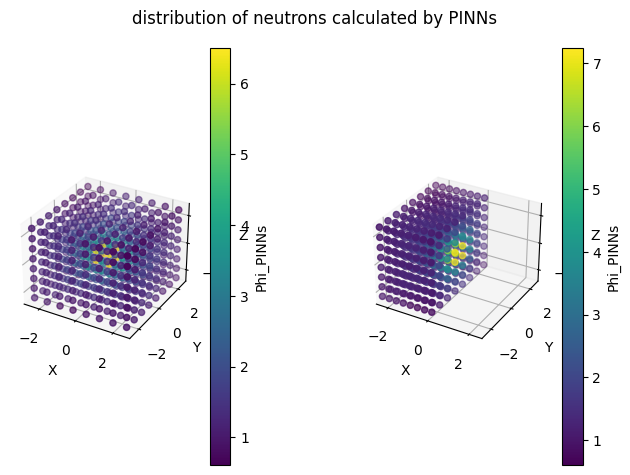

In [18]:
x = np.linspace(-a / 2, a / 2, 8)
y = np.linspace(-b / 2, b / 2, 8)
z = np.linspace(-c / 2, c / 2, 8)
x_test, y_test, z_test = np.meshgrid(x, y, z)
x_test = tf.reshape(x_test, [-1,1])
y_test = tf.reshape(y_test, [-1,1])
z_test = tf.reshape(z_test, [-1,1])

Phi_PINNs = phi_PINNs(x_test, y_test, z_test, a, b, c, phi_0)
phi_analytical = phi(x_test, y_test, z_test, a, b, c, phi_0)
mse = np.mean(np.square(Phi_PINNs - phi_analytical))
print('MSE: {}'.format(mse))
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(x_test, y_test, z_test, c=Phi_PINNs, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.suptitle('distribution of neutrons calculated by PINNs')

cbar1 = fig.colorbar(scatter1, ax=ax1)
cbar1.set_label('Phi_PINNs')

x = np.linspace(-a / 2, 0, 8)
y = np.linspace(-b / 2, b / 2, 8)
z = np.linspace(-c / 2, c / 2, 8)
x_test_half, y_test_half, z_test_half = np.meshgrid(x, y, z)
x_test_half = tf.reshape(x_test_half, [-1,1])
y_test_half = tf.reshape(y_test_half, [-1,1])
z_test_half = tf.reshape(z_test_half, [-1,1])
Phi_PINNs_half = phi_PINNs(x_test_half, y_test_half, z_test_half , a, b, c, phi_0)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(x_test_half, y_test_half, z_test_half, c=Phi_PINNs_half, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2.5, 2.5])
cbar2 = fig.colorbar(scatter2, ax=ax2)
cbar2.set_label('Phi_PINNs')


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()